# Students Performance Analysis

In this data project we are going to make a simple explorative analysis with a data set that includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.
The data set consists of the marks secured by the students in various subjects and can be found <a href="http://roycekimmons.com/tools/generated_data/exams">here</a>.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
students = pd.read_csv("StudentsPerformance.csv")

## 1. Data Exploration

In [42]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


This dataset has 8 columns and 1000 rows. There are no missing values. 

In [43]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [44]:
students.describe(include = "all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


What does the data tell us so far?

There are 1000 scores for math, reading and writing. Their means are all really close to each other. 66, 69 and 68 respectively with standard deviations of 15.1, 14.6 and 15.2. The minimum scores passed were 0.00 for math, 17.0 for reading and 10.0 for writing. For all three disciplines the highest score of 100 was achieved by at least one student.

The data shows is that the students are categorized by:
Gender (male/female)
Race/ethnicity (group A - group E, it is not known what the categorizations of these groups are)
Parental level of education: some high school, high school, some college, associate's degree, bachelor's degree, and master's degree
Lunch: standard or free/reduced.

## 2. Description of gender, ethnicity and parental level of education

In [45]:
students['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

518 female and 482 male students have participated in the exams.

<AxesSubplot:xlabel='gender', ylabel='count'>

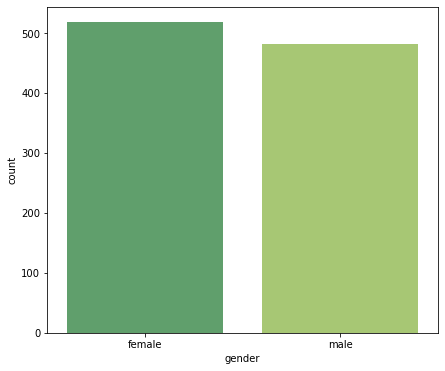

In [46]:
plt.figure(figsize=(7, 6))
sns.countplot(x=students['gender'], data=students, palette='summer')

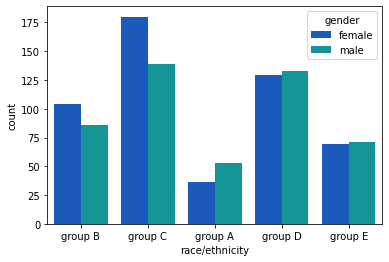

In [47]:
sns.countplot(x='race/ethnicity', data=students, palette='winter', hue='gender');

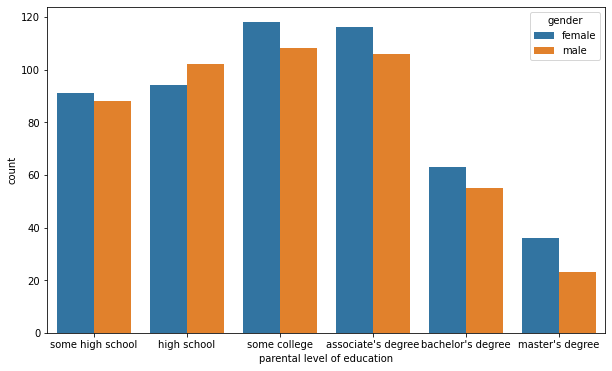

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', data=students, hue='gender', order=['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']);

## 3. Correlation between reading, writing, and math scores

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

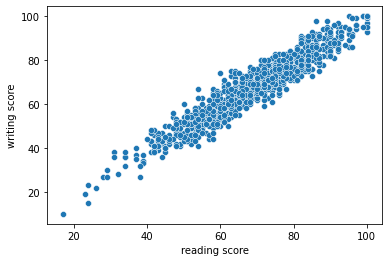

In [49]:
sns.scatterplot(x='reading score', y='writing score', data=students)

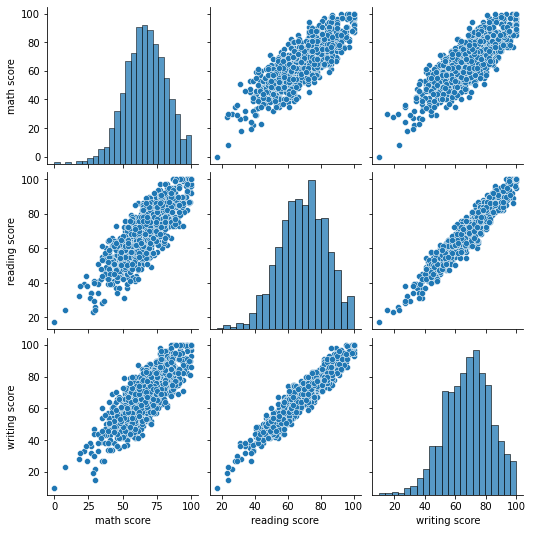

In [50]:
sns.pairplot(data=students)

<AxesSubplot:xlabel='reading score', ylabel='math score'>

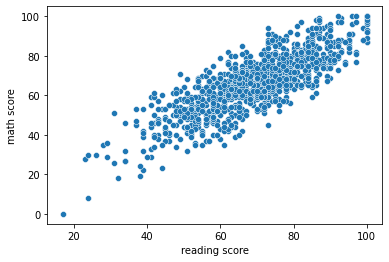

In [51]:
sns.scatterplot(x='reading score', y='math score', data=students)

<AxesSubplot:xlabel='writing score', ylabel='math score'>

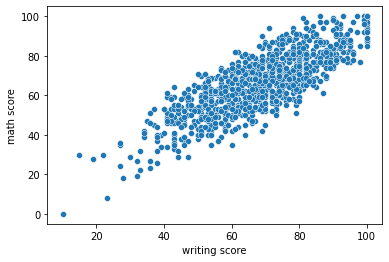

In [52]:
sns.scatterplot(x='writing score', y='math score', data=students)

<AxesSubplot:>

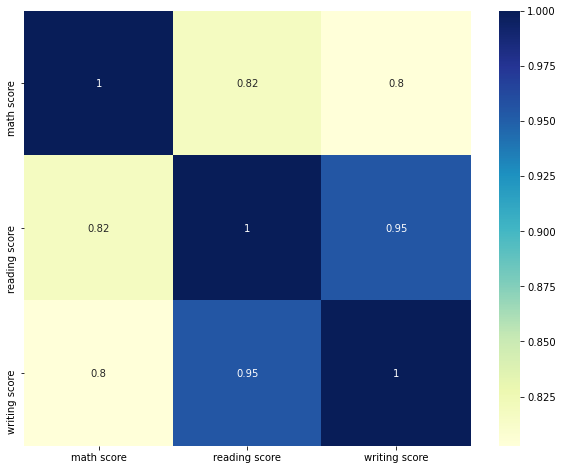

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(students.corr(), annot=True, cmap="YlGnBu")

It makes sense that the correlation between reading and writing score is high. The correlation between reading and writing scores on the one hand and math scores on the other hand is a bit lower, but still high with R-values of: 0.82 and 0.8 respectively. Let's combine these three scores together and see the correlation with other factors.

## Correlation of parent's education level / lunch fee and total scores

In [54]:
students["total_score"] = students["math score"] + students["reading score"] + students["writing score"]
students["total_score"] = students["total_score"] / 3

In [55]:
students["parenteduc_nr"] = students["parental level of education"]
students["parenteduc_nr"].replace({'some high school': 1, 'high school': 2, 'some college': 3, "associate's degree": 4, "bachelor's degree": 5, "master's degree": 6}, inplace=True)
students = pd.DataFrame(students)
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,parenteduc_nr
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,5
1,female,group C,some college,standard,completed,69,90,88,82.333333,3
2,female,group B,master's degree,standard,none,90,95,93,92.666667,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,4
4,male,group C,some college,standard,none,76,78,75,76.333333,3


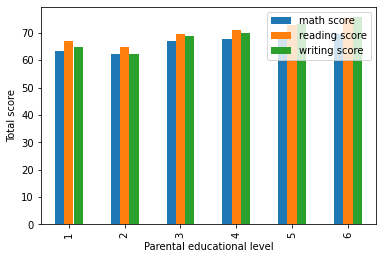

In [56]:
students.groupby(by='parenteduc_nr').mean()[["math score", "reading score", "writing score"]].plot.bar()
plt.xlabel('Parental educational level')
plt.ylabel('Total score')
plt.show()


We see that in general the higher the educational level of the parents, the higher the total score of the student.

<AxesSubplot:xlabel='lunch'>

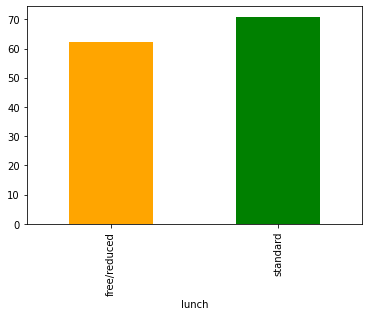

In [57]:
students.groupby('lunch')['total_score'].mean().plot.bar(color=['orange', 'green'])

Finally, we see that the students in school with free or reduced lunches score lower on their test scores than students in schools with standard lunch prices. 